<a href="https://colab.research.google.com/github/dibyajyoti19/Hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#importing libraries for analysing the dataset
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(13,7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/MyDrive/project/Hotel Booking Analysis/Hotel Bookings.csv'
df =pd.read_csv(path)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

(119390, 32)

# ***I AM EXPLAINING SOME OF COLUMNS PRESENT IN DATABASE HERE :-***

->hotel : It has string 2 values.

->is_canceled : In this column 0 meaning canceled and 1 meaning not canceled

->lead_time : The number of time/days between booking the room and the time/day arrive at the hotel.

->arrival_date_year : In which year customer go arrived that hotel.

->arrival_date_month : In which month customer go arrived that hotel.

->arrival_date_week_number :In which Week customer arrived to the hotel.

->arrival_date_day_of_month : Date of the month on which the customer arrived

->stays_in_weekend_nights : Number of weekend nights booked by customer. # weekend like SUNDAY & SATURDAY

->stays_in_week_nights : Number of week nights booked by customer.       # Weekdays means MONDAY TO FRIDAY

->adults : No. of adults present here

-->like this here i am explain some columns here and other columns are also very important to me but here i want to show a kind of sample 
of columns present in database and what kind of value present their.

In [ ]:
#Finding out which columns have null value
df. isnull().sum()        

### Her we can see in column company '112593' null value present and like that in agent '16340' , in country '488' and in children '4' null value are present 

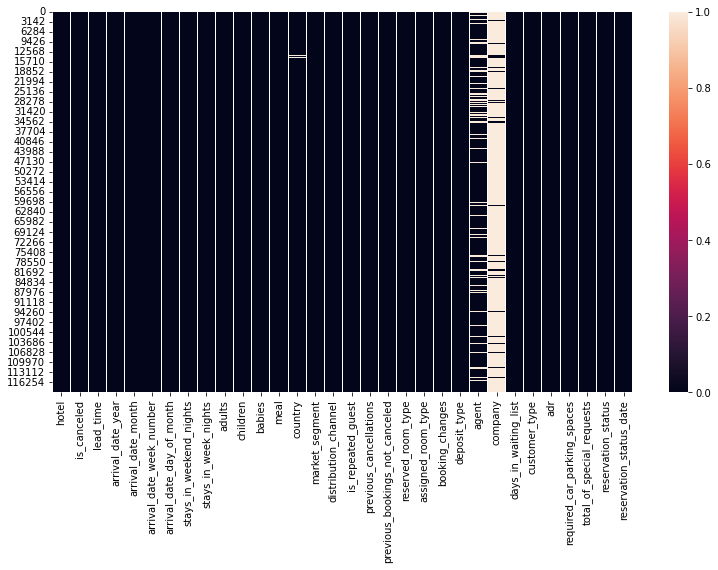

In [ ]:
# Here i see the null value by heatmap
sns.heatmap(df.isnull())                  
plt.show()

### As we see in column country, agent and company so many white shape are present the white shapes are null values in the data.
### And we have to clean the data for better result.

In [ ]:
# Here i am found null values in percentage per column have
df.isnull().sum()/df.shape[0]*100         

In [ ]:
# Replacing null value
df001= df.drop(['company','agent'],axis=1)
df001=df001.fillna({'children':0}) 
df001=df001.fillna({'country':'unknown'})

In [ ]:
#checking the duplicate rows present in the data
df001[df001.duplicated()].shape 

(0, 30)

In [ ]:
#droping the duplicates pamanetly
df001.drop_duplicates(inplace=True)

### Like you see the data in column company,agent,Chidren and country has null value thats why i am drop company and agent here and fill children,contry with '0' and 'unknow' value for better understending the data.
### After the cleaning in column part i looking how many duplicates row are their and i found nearly 32000 duplicate rows and i droped those column for better analysis

In [ ]:
# Here it is the clean database
df001.shape

(87370, 30)

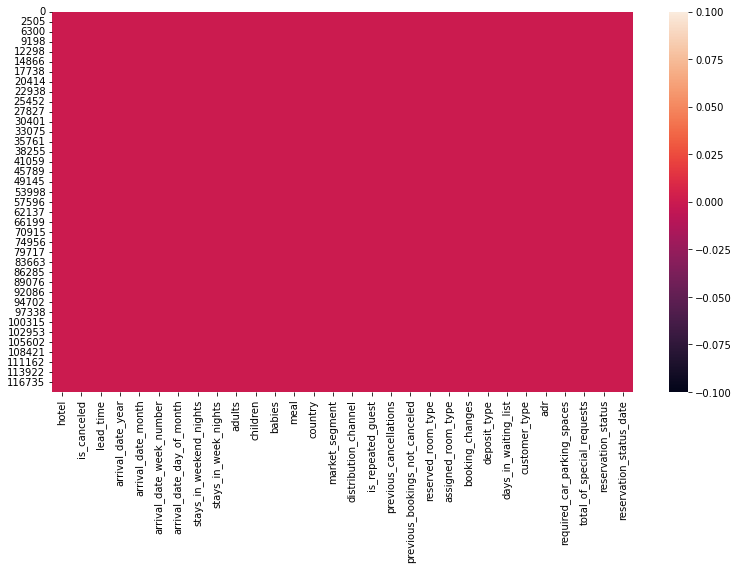

In [ ]:
# After cleaning the data here i show how data looks by heatmap.
sns.heatmap(df001.isnull())               
plt.show()

### As you see their is no white space is there that means our data is clean now

# **Q1 Have you ever wondered when the best time of year to book a hotel room is?**

In [ ]:
#per month booking in each year with df001
month_booking1=df001.groupby('arrival_date_year')['arrival_date_month'].value_counts().unstack().fillna(0)
month_booking1

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_year,,,,,,,,,,,,
2015,0.0,2451.0,1981.0,0.0,0.0,1674.0,0.0,0.0,0.0,1662.0,2700.0,2839.0
2016,3769.0,4423.0,3148.0,2805.0,1848.0,3849.0,3516.0,3831.0,3779.0,3330.0,4234.0,3849.0
2017,4137.0,4380.0,0.0,3290.0,2843.0,4530.0,4248.0,3680.0,4574.0,0.0,0.0,0.0


Here in month_booking1 the table which i grouped by arrival_date_year in that the months are not in sequence

In [ ]:
#createing new column for numeric no. of Month
month_d= {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
          'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df001['month_num'] = df001.arrival_date_month.map(month_d)                       
df001

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_num
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,8
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,8
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,8
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,8


 Here i  create a month dic. for converting month in object format to month in int format.
Then i create a new column  called month_num and by map fuction i am maped all month values in int format.

In [ ]:
#per month booking in each year with df002
month_booking2=df001.groupby('arrival_date_year')['month_num'].value_counts().unstack().fillna(0)
month_booking2

month_num,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,0.0,0.0,0.0,0.0,0.0,0.0,1674.0,2451.0,2839.0,2700.0,1662.0,1981.0
2016,1848.0,2805.0,3831.0,3769.0,3779.0,3516.0,3849.0,4423.0,3849.0,4234.0,3330.0,3148.0
2017,2843.0,3290.0,3680.0,4137.0,4574.0,4248.0,4530.0,4380.0,0.0,0.0,0.0,0.0


After creating new database i am convert arrival_date_month in to number fromat like (January=1...) and maped in to a new column call month_num.
you can see the diffrece between the month_booking1 and month_booking2

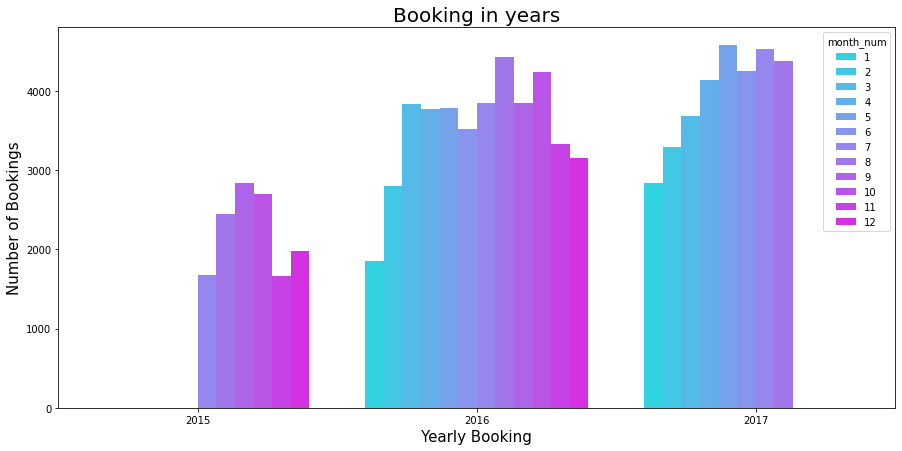

In [ ]:
#showing Booking per year by seaborn BAR graph
plt.figure(figsize=(15,7))
sns.countplot(x='arrival_date_year',data=df001,hue='month_num',palette='cool')
plt.title('Booking in years',fontsize=20)
plt.xlabel('Yearly Booking',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

Most of the bookings happenes in the year 2016. And the best time of year to book a hotel room is after the month MAY as you the data and graph above pepole booking hotels after the month MAY .

# **Q2 the optimal length of stay in order to get the best daily rate?**

In [ ]:
#calculate total nights stay by customer
df001['Total_nights']= df001['stays_in_weekend_nights'] + df001['stays_in_week_nights']

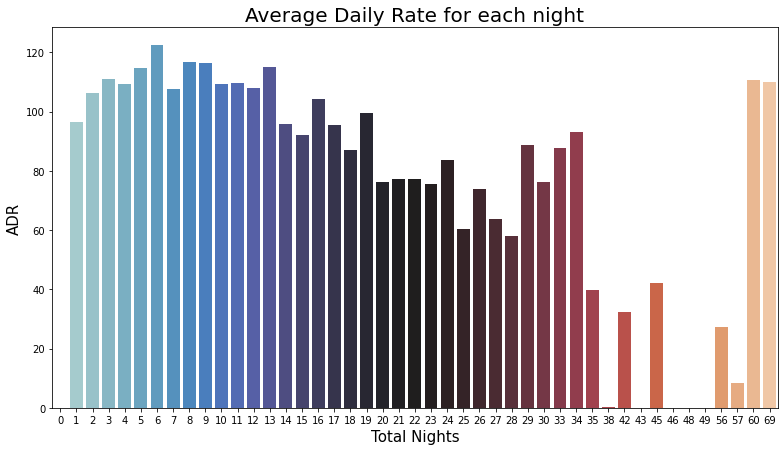

In [ ]:
# Here i a bar chart by seaborn to see the ADR
sns.barplot(x='Total_nights',y='adr',data=df001,ci=0.01,palette='icefire')        
plt.title('Average Daily Rate for each night',fontsize=20)
plt.ylabel('ADR',fontsize=15)
plt.xlabel('Total Nights',fontsize=15)
plt.show()

**ADR(average daily rate)= TOTAL ROOM in hotel/ TOTAL ROOM SOLD**

Your ADR shows you how much you make on average per room sold. If you see that your ADR has increased over time, this means you’re making more revenue from every room you sell.
If you see here the best daily rate is in between 6 and 8 days.
who has stay for 6 to 8 days they give best revenue to hotel.

# **Q3 What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?**

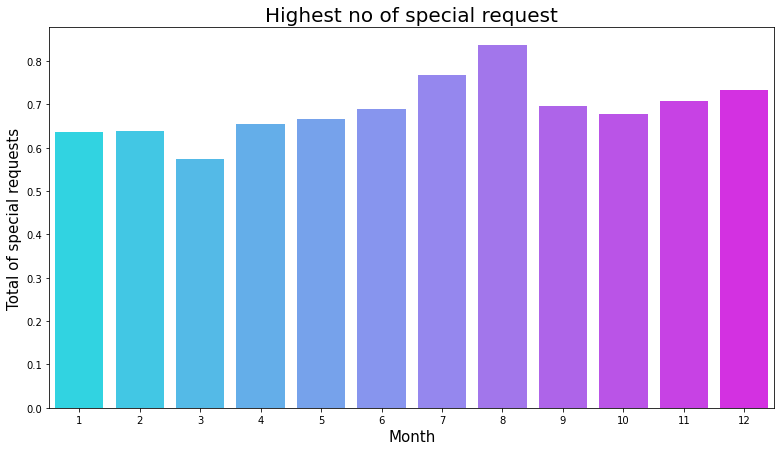

In [ ]:
# Here i use seaborn bar graph to see highest no. of special request in all the year
sns.barplot(x='month_num',y='total_of_special_requests',data=df001,ci=0.01,palette= 'cool')
plt.xlabel('Month',fontsize=15)                                                 
plt.ylabel('Total of special requests',fontsize=15)                             
plt.title('Highest no of special request',fontsize=20)
plt.show()

***Here we can say:-***
In the Month of July and August Hotels are getting high amount of Special Requests from Customers.
Hence, it can be predict that hotels are receive a large number of special requests in the month of July and August in the upcoming year.

# ***Q4 In which way do customer prefer most to booking hotels ?***

In [ ]:
# showing the customer booking data by which they book most.
df001['market_segment']

0                Direct
1                Direct
2                Direct
3             Corporate
4             Online TA
              ...      
119385    Offline TA/TO
119386        Online TA
119387        Online TA
119388        Online TA
119389        Online TA
Name: market_segment, Length: 87370, dtype: object

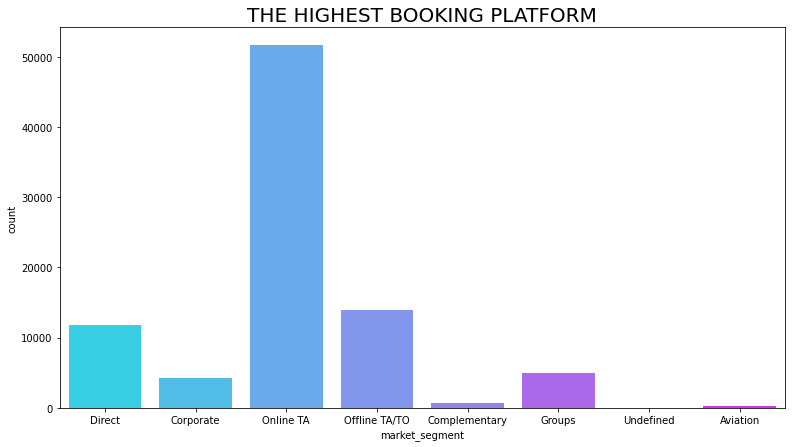

In [ ]:
# By the graph we can clearly see the data.
sns.countplot(x='market_segment',data=df001,palette='cool')
plt.title('THE HIGHEST BOOKING PLATFORM',fontsize=20)
plt.show()

As you see customer prefered most is online TA for booking the hotels.
and the 2nd most prefer way is online TA/TO and follwed by groups also the most prefered way

# ***Q5 Which room type is the most reserved room type?***

In [ ]:
# show the most reserved room type
df001['reserved_room_type'].value_counts()

A    56529
D    17398
E     6046
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

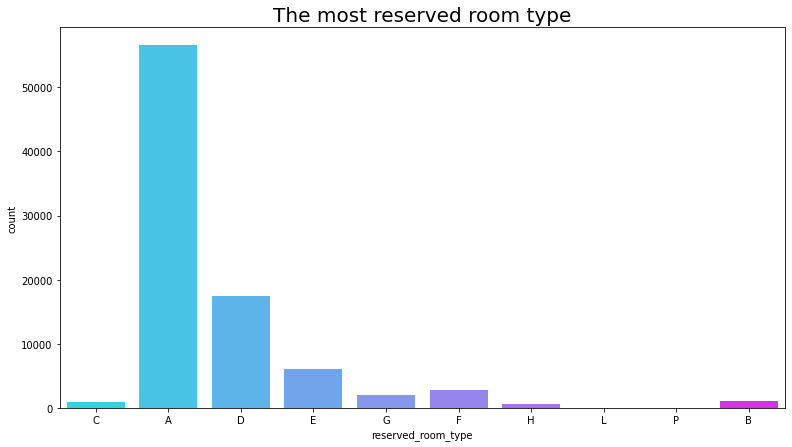

In [ ]:
#showing in graph the most reserved room type
sns.countplot(x='reserved_room_type', data=df001, palette='cool')
plt.title('The most reserved room type',fontsize=20)
plt.show()

As you see in graph type 'A' rooms are the most reserved room , after that type 'D' & 'E' also reserved by customer.
But type 'L' & type 'P' rooms are not at all reserved by any customer.

# **Q6 What is the reservation percentage in hotels?**

In [ ]:
#showing reservation status
df001['reservation_status']

0         Check-Out
1         Check-Out
2         Check-Out
3         Check-Out
4         Check-Out
            ...    
119385    Check-Out
119386    Check-Out
119387    Check-Out
119388    Check-Out
119389    Check-Out
Name: reservation_status, Length: 87370, dtype: object

In [ ]:
#showing reservation sattus in count
reservation=df001['reservation_status'].value_counts()
reservation

Check-Out    63349
Canceled     23007
No-Show       1014
Name: reservation_status, dtype: int64

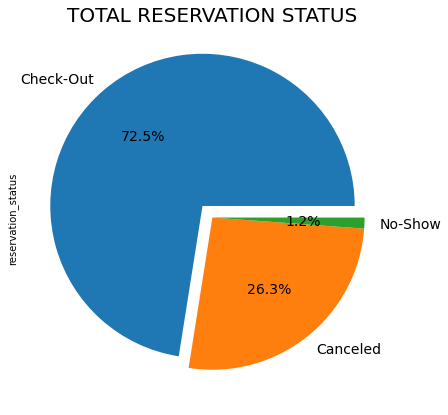

In [ ]:
#showing reservation status in graph
plot=reservation.plot.pie(autopct='%1.1f%%',textprops={'fontsize':14},explode=(0.1,0,0))
plt.title('TOTAL RESERVATION STATUS',fontsize=20)
plt.show()

### As you see in graph the percentage of reservation sattus is like this
### from total reservation 72.5% is CHECK-OUT and 26.3% is CANCELED and 1.2% is NO_SHOW.

# ***Q7 Whichi hotel type preferred most by the customer and why?***

In [ ]:
#Showing diffrent type of hotels and their no.
df001['hotel'].value_counts()

City Hotel      53414
Resort Hotel    33956
Name: hotel, dtype: int64

In [ ]:
#Count total no of nights
df001['Total_nights'].value_counts()

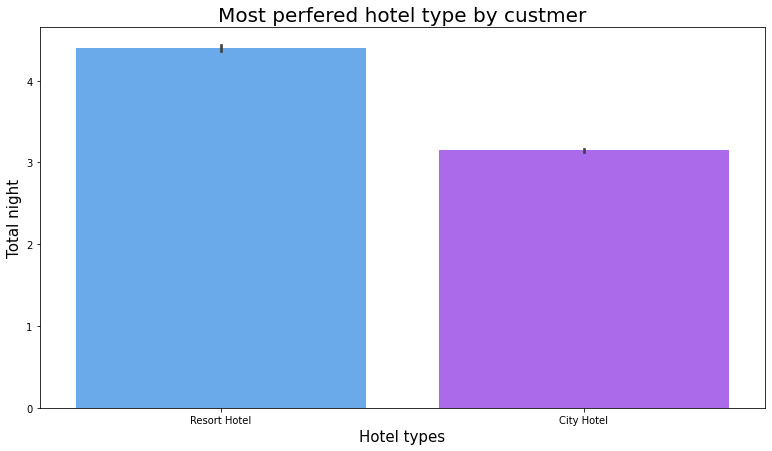

In [ ]:
#Showing the most perfered hotel by graph
sns.barplot(x='hotel',y='Total_nights',data=df001,palette= 'cool')
plt.xlabel('Hotel types',fontsize=15)                                                 
plt.ylabel('Total night',fontsize=15)                             
plt.title('Most perfered hotel type by custmer',fontsize=20)
plt.show()

### Here i found the most perfer hotel type by customer but i have to find why also.
### As you see the most perfered hotel type is RESORT HOTEL.

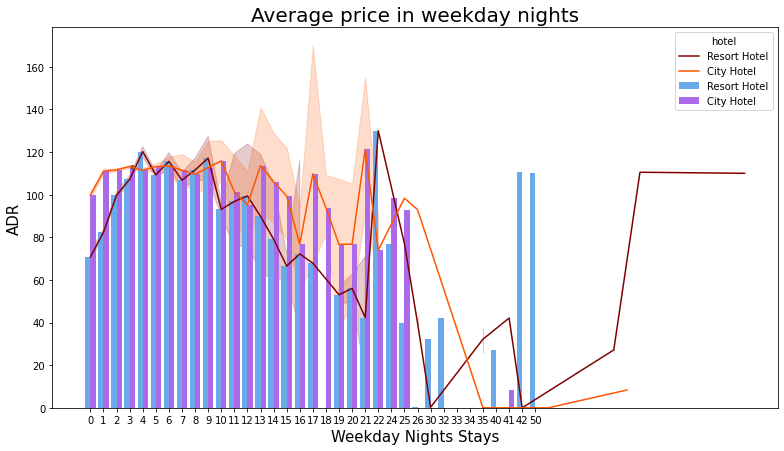

In [ ]:
#showing average peice in weekdyas in hotels
sns.barplot(x='stays_in_week_nights',y='adr',data=df001,hue='hotel',ci=0.01,palette='cool')
sns.lineplot(x='stays_in_week_nights',y='adr',data=df001,hue='hotel',palette='gist_heat')
plt.xlabel('Weekday Nights Stays',fontsize=15)
plt.ylabel('ADR',fontsize=15)
plt.title('Average price in weekday nights',fontsize=20)
plt.show()

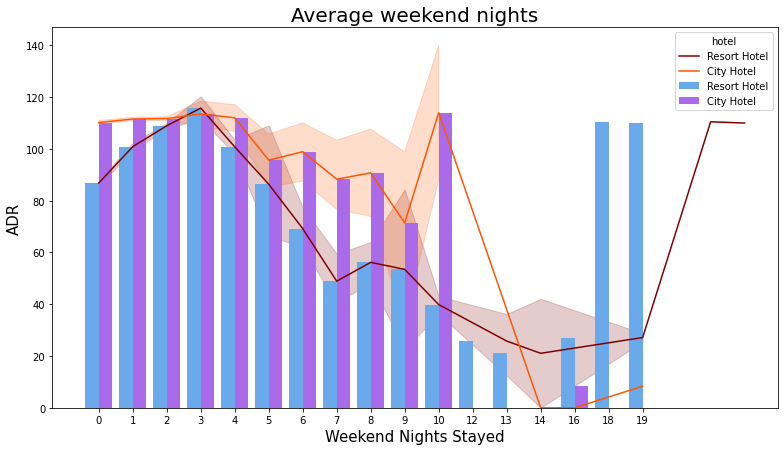

In [ ]:
#showing average peice in weekend nights in hotels
sns.barplot(x='stays_in_weekend_nights',y='adr',data=df001,hue='hotel',ci=0.01,palette='cool')
sns.lineplot(x='stays_in_weekend_nights',y='adr',data=df001,hue='hotel',palette='gist_heat')
plt.title('Average weekend nights',fontsize=20)
plt.xlabel('Weekend Nights Stayed',fontsize=15)
plt.ylabel('ADR',fontsize=15)
plt.show()

### If you see the above graph we can say that, If a customer wants affordable stay then they can choose Resort Hotels not  City Hotels because in both the graph representation you can see that Resort Hotel is offering less price than City Hotel.
### That's why people prefer the Resort Hotel most not City Hotel.

# **Q8 Which type of customer coming hotels most & Which type of customer give more  revene to the hotels ?**

In [ ]:
#showing diffrent type of customer and their no.
df001['customer_type'].value_counts()

Transient          71967
Transient-Party    11720
Contract            3139
Group                544
Name: customer_type, dtype: int64

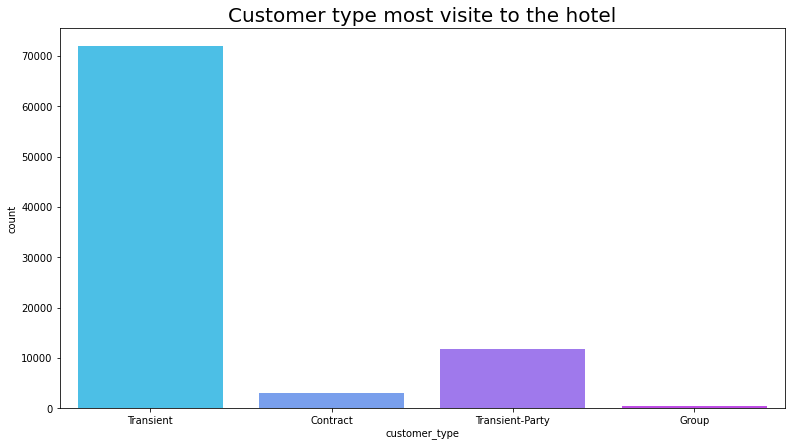

In [ ]:
#showing diffrent type of customer by graph.
sns.countplot(x="customer_type", data=df001, palette='cool')
plt.title('Customer type most visite to the hotel',fontsize=20)
plt.show()

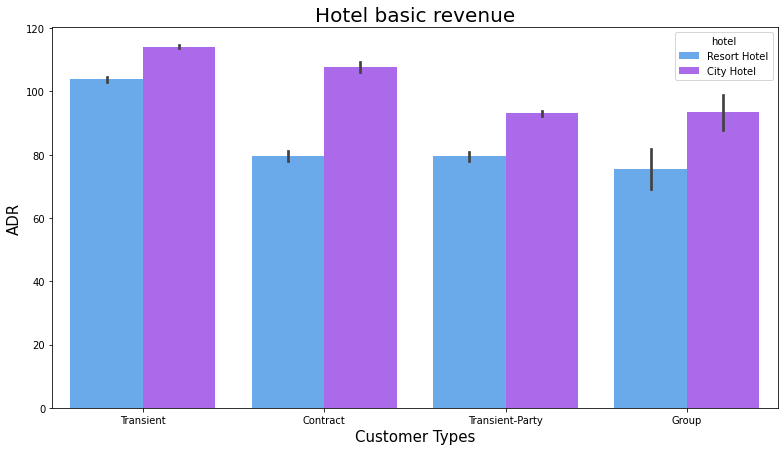

In [ ]:
#showing diffrent type of customer and their revenue on basis of hotel
sns.barplot(x='customer_type',y='adr',data=df001,hue='hotel',palette='cool')
plt.title("Hotel basic revenue", fontsize=20)
plt.xlabel('Customer Types',fontsize=15)
plt.ylabel('ADR',fontsize=15)
plt.show()

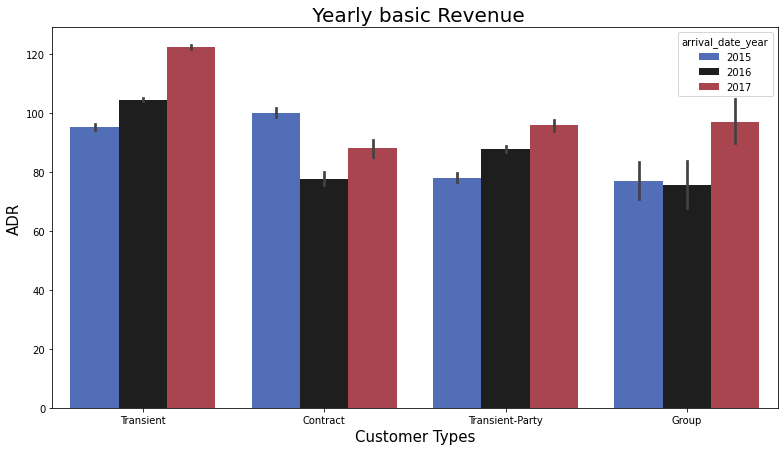

In [ ]:
#showing diffrent type of customer and their revenue on basic of year
sns.barplot(x='customer_type',y='adr',data=df001,hue='arrival_date_year',palette='icefire')
plt.title(" Yearly basic Revenue", fontsize=20)
plt.xlabel('Customer Types',fontsize=15)
plt.ylabel('ADR',fontsize=15)
plt.show()

### As you see in graph the most visiting customer in hotel is Tranient and the most revenue generating  cutomer is also Transient .
### Every year Transient customer type give good revenue to hotels and city hotels got more revenue then resort hotel.

# **Q9 Which meal type is most prefered meal of customers?**

In [ ]:
df001['meal'].value_counts()

BB           67956
SC            9480
HB            9083
Undefined      492
FB             359
Name: meal, dtype: int64

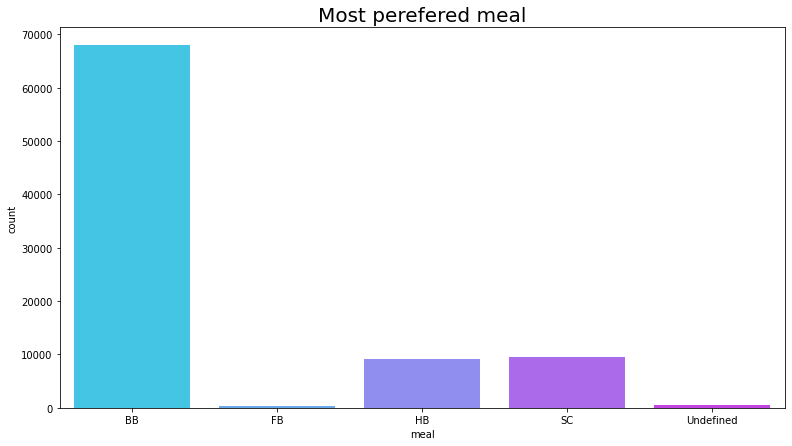

In [ ]:
sns.countplot(x="meal", data=df001, palette='cool')
plt.title('Most perefered meal',fontsize=20)
plt.show()

###As per the data the most perfered meal is BB type meal,BB meal is Bed and breakfast.

# **Q10 Which type of meal perfered by children and adults most ?**

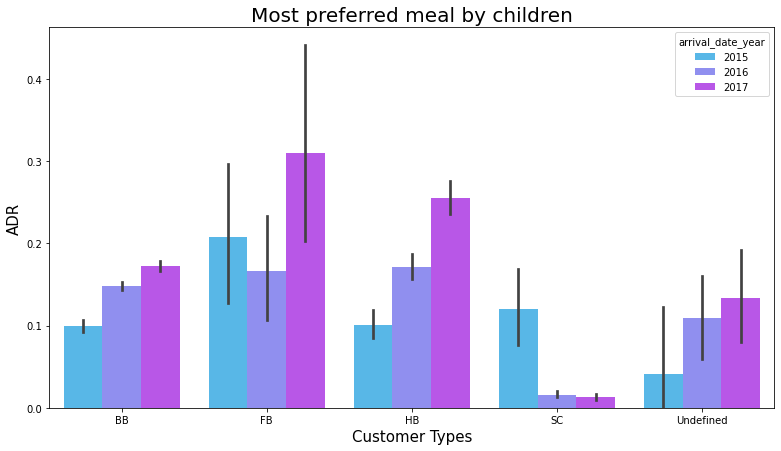

In [ ]:
#showing the most perfered meal as per children
sns.barplot(x='meal',y='children',data=df001,hue='arrival_date_year',palette='cool')
plt.title("Most preferred meal by children", fontsize=20)
plt.xlabel('Customer Types',fontsize=15)
plt.ylabel('ADR',fontsize=15)
plt.show()

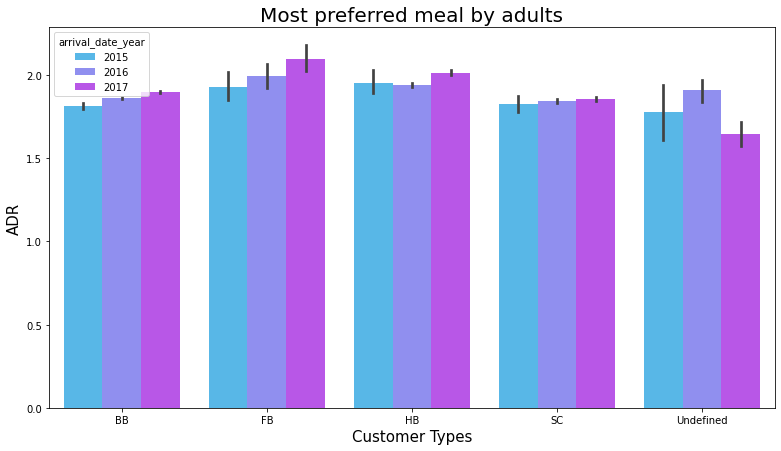

In [ ]:
#showing the most perfered meal as per adults
sns.barplot(x='meal',y='adults',data=df001,hue='arrival_date_year',palette='cool')
plt.title("Most preferred meal by adults", fontsize=20)
plt.xlabel('Customer Types',fontsize=15)
plt.ylabel('ADR',fontsize=15)
plt.show()

## FB means Full board meal, In FB bed,breakfast,lunch,evening meal all meals are inclued.
## **As per the graph the most perfred meal is FB as per children and adults.**